## **1.) Importing modules and libraries**

In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, math, cv2
from sklearn.model_selection import train_test_split
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))
        
print('Done !! ')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Done !! 


## **2.) Loading data and observing it**

In [42]:
labels = pd.read_csv('../input/dog-breed-identification/labels.csv')
labels

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [43]:
labels.breed.nunique()

120

In [44]:
labels.breed.unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [45]:
label_count = labels.breed.value_counts()
print(len(label_count))
print(label_count)
label_count.index
# label_count

120
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64


Index(['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher',
       'bernese_mountain_dog', 'shih-tzu', 'great_pyrenees', 'pomeranian',
       'basenji', 'samoyed',
       ...
       'otterhound', 'german_shepherd', 'walker_hound', 'tibetan_mastiff',
       'giant_schnauzer', 'golden_retriever', 'brabancon_griffon', 'komondor',
       'eskimo_dog', 'briard'],
      dtype='object', length=120)

<AxesSubplot:>

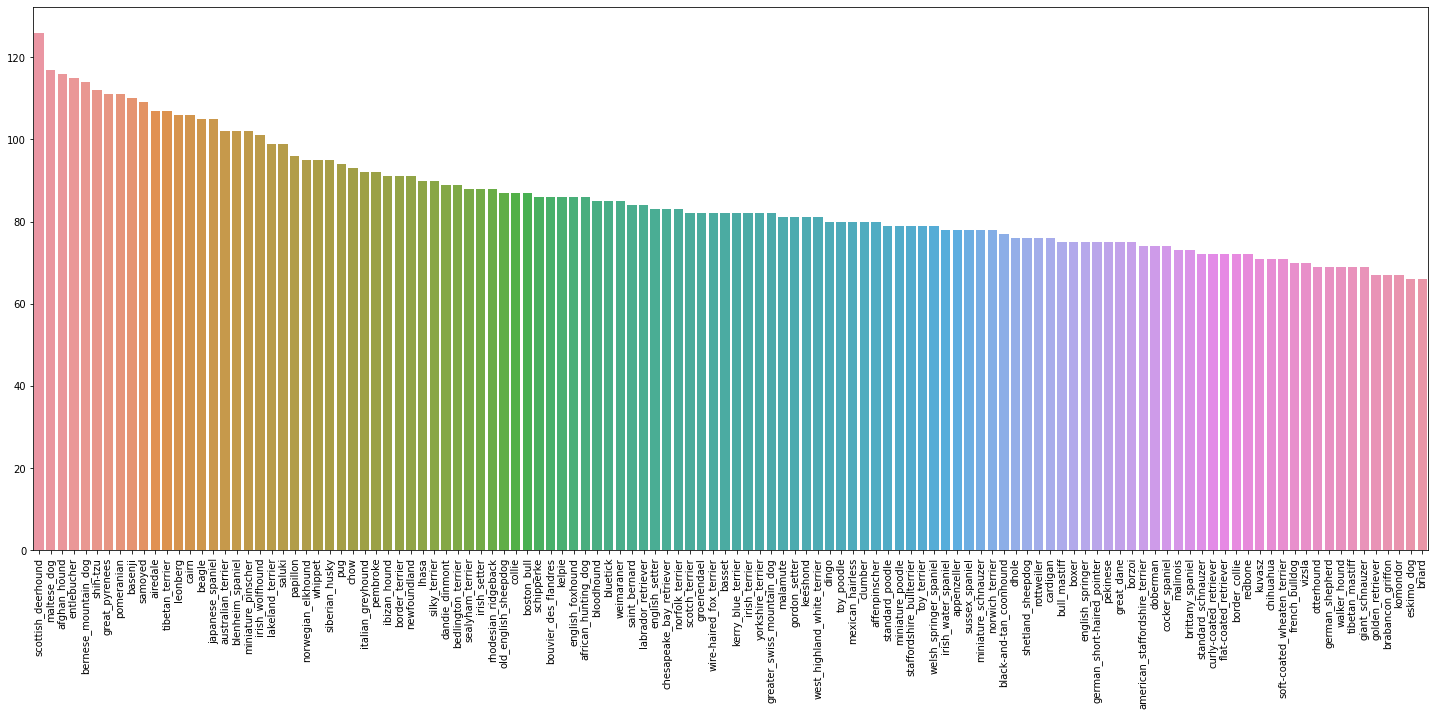

In [46]:
plt.figure(figsize = (25,10))
plt.xticks(rotation=90)
sns.barplot(x=label_count.index,y=label_count.values)

In [47]:
sample_submission = pd.read_csv('../input/dog-breed-identification/sample_submission.csv')
sample_submission

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10353,fff1ec9e6e413275984966f745a313b0,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10354,fff74b59b758bbbf13a5793182a9bbe4,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10355,fff7d50d848e8014ac1e9172dc6762a3,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [48]:
TRAIN_DIR = '../input/dog-breed-identification/train'
TEST_DIR =  '../input/dog-breed-identification/test'
print(type(labels.loc[2133].id))
labels.loc[2133]

<class 'str'>


id       351a08cd2b2fca3a3f57cf4007857231
breed                          schipperke
Name: 2133, dtype: object

In [49]:
labels.id = TRAIN_DIR + '/' + labels.id + '.jpg'
labels.loc[2133].id

'../input/dog-breed-identification/train/351a08cd2b2fca3a3f57cf4007857231.jpg'

In [50]:
labels.loc[2133]

id       ../input/dog-breed-identification/train/351a08...
breed                                           schipperke
Name: 2133, dtype: object

In [51]:
labels.head()

,id,breed
0,../input/dog-breed-identification/train/000bec...,boston_bull
1,../input/dog-breed-identification/train/001513...,dingo
2,../input/dog-breed-identification/train/001cdf...,pekinese
3,../input/dog-breed-identification/train/00214f...,bluetick
4,../input/dog-breed-identification/train/0021f9...,golden_retriever


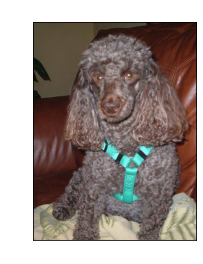

original shape :  (375, 500)


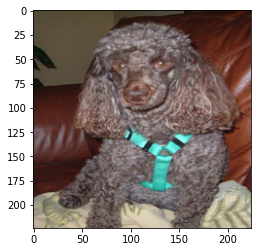

reshaped shape :  (224, 224)


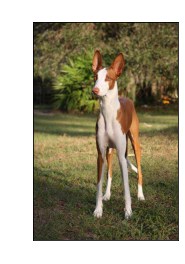

original shape :  (333, 500)


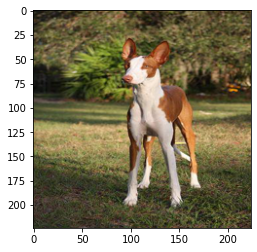

reshaped shape :  (224, 224)


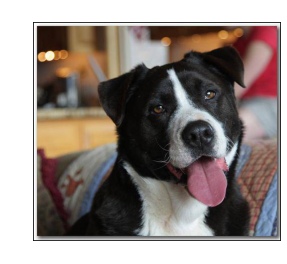

original shape :  (500, 440)


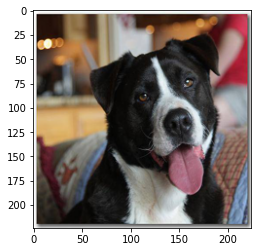

reshaped shape :  (224, 224)


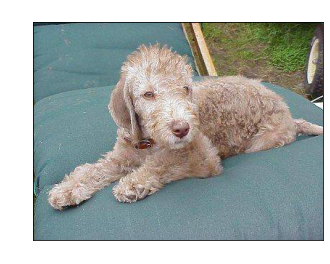

original shape :  (400, 300)


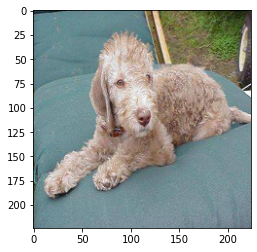

reshaped shape :  (224, 224)


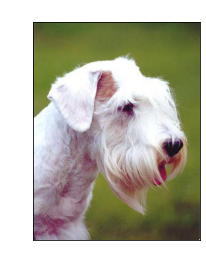

original shape :  (343, 448)


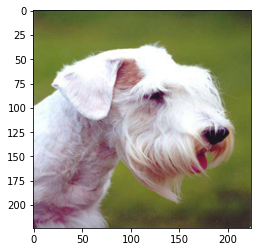

reshaped shape :  (224, 224)


In [52]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from PIL import Image
for i in range(2212,2217):
    plt.title(labels.loc[i].breed,color='w')
    plt.tick_params(axis='x', colors='w')
    plt.tick_params(axis='y', colors='w')
    plt.imshow(Image.open(labels.loc[i].id))
    plt.show()
    print('original shape : ', Image.open(labels.loc[i].id).size)
    plt.imshow(Image.open(labels.loc[i].id).resize((224,224)))
    plt.show()
    print('reshaped shape : ', (224,224))

In [53]:
image.img_to_array(load_img(labels.loc[i].id)).shape

(448, 343, 3)

## **3.) Making Training data**

In [54]:
labels = pd.read_csv('../input/dog-breed-identification/labels.csv')
labels.id = labels.id + '.jpg'

In [55]:
IMAGE_SIZE = (331, 331, 3)

In [56]:
train_df, val_df = train_test_split(labels, test_size=0.1)

train_df.reset_index(drop = True,inplace=True)
val_df.reset_index(drop = True,inplace=True)

train_gen = ImageDataGenerator(rotation_range = 30,
                                  zoom_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  shear_range = 0.1,
#                                   rescale = 1./255.,
                                  horizontal_flip = True,
                                  )
val_gen = ImageDataGenerator(
#                                 rescale = 1./255.
                            )

train_data = train_gen.flow_from_dataframe(dataframe = train_df,
                                           directory = TRAIN_DIR,
                                           x_col = 'id', y_col = 'breed',
                                           class_mode = 'categorical',
#                                            shuffle=False
                                           target_size=(IMAGE_SIZE[0], IMAGE_SIZE[0]) 
                                          )
val_data = val_gen.flow_from_dataframe(dataframe = val_df,
                                       directory = TRAIN_DIR,
                                       x_col = 'id', y_col = 'breed',
                                       class_mode = 'categorical',
#                                            shuffle=False
                                   target_size=(IMAGE_SIZE[0], IMAGE_SIZE[0])
                                      )

Found 9199 validated image filenames belonging to 120 classes.
Found 1023 validated image filenames belonging to 120 classes.


In [57]:
print(train_data.class_indices)
print(train_data[0][0].shape)
print(train_data[0][1].shape)
train_data[0][1][19].sum()

{'affenpinscher': 0, 'afghan_hound': 1, 'african_hunting_dog': 2, 'airedale': 3, 'american_staffordshire_terrier': 4, 'appenzeller': 5, 'australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'bedlington_terrier': 10, 'bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'border_collie': 16, 'border_terrier': 17, 'borzoi': 18, 'boston_bull': 19, 'bouvier_des_flandres': 20, 'boxer': 21, 'brabancon_griffon': 22, 'briard': 23, 'brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'cardigan': 27, 'chesapeake_bay_retriever': 28, 'chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'curly-coated_retriever': 34, 'dandie_dinmont': 35, 'dhole': 36, 'dingo': 37, 'doberman': 38, 'english_foxhound': 39, 'english_setter': 40, 'english_springer': 41, 'entlebucher': 42, 'eskimo_dog': 43, 'flat-coated_retriever': 44, 'french_bulldog': 45, 'german_shepherd': 46, 'german_short-haired_pointer': 47, 'gian

1.0

In [58]:
img_dog = load_img(TRAIN_DIR+'/'+train_df.loc[np.random.randint(0,train_df.shape[0])].at['id'])

img_dog_arr = image.img_to_array(img_dog)
img_dog_arr = img_dog_arr.reshape((1,)+ img_dog_arr.shape)
aug_images_dog = train_gen.flow(img_dog_arr)

aug_images_dog[0].shape

(1, 500, 489, 3)

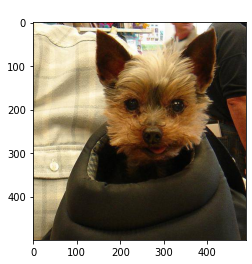

batch =  (1, 500, 489, 3)
batch =  (1, 500, 489, 3)
batch =  (1, 500, 489, 3)
batch =  (1, 500, 489, 3)
batch =  (1, 500, 489, 3)
batch =  (1, 500, 489, 3)
batch =  (1, 500, 489, 3)
batch =  (1, 500, 489, 3)
batch =  (1, 500, 489, 3)
batch =  (1, 500, 489, 3)


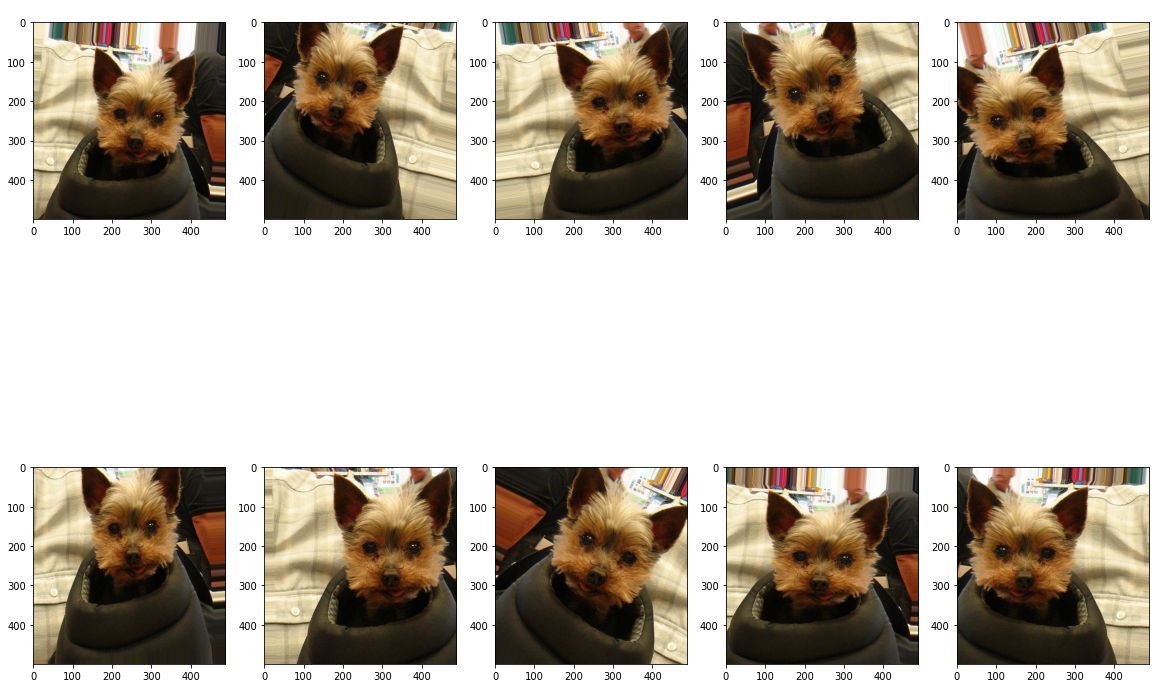

In [59]:
plt.imshow(img_dog)
plt.title("original",color = 'white')
plt.show()
i=1
plt.figure(figsize=(20,15))
for batch in aug_images_dog:
    plt.subplot(2,5,i)
    print("batch = ", batch.shape)
    plt.imshow(image.array_to_img(batch[0]))
    plt.title("augmented",color='w')
#     plt.show()
    i += 1
    if i % 11 == 0:
        break

## **4.) Trying out 1st model => InceptionV3**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

def get_inception_model():
    pretrained_model = InceptionV3(input_shape = (299,299,3),include_top=False,
                                   weights='imagenet')
#     pretrained_model.load_weights()
#     for layer in pretrained_model.layers:
#         layer.trainable = False
    pretrained_model.trainable = False
    
#     best_model = keras.models.Sequential()
#     best_model.add(pretrained_model)
#     best_model.add(tfl.Flatten())
#     best_model.add(tfl.Dense(64, activation='relu'))
#     best_model.add(tfl.Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
#     best_model.add(tfl.Dropout(0.2))
#     best_model.add(tfl.Dense(120, activation='softmax'))
#     return best_model
    inputs = tfl.Input(shape=(299,299,3))
    x = preprocess_input(inputs)
    x = pretrained_model(x,training=False)
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.Dropout(0.2)(x)
    x = tfl.Dense(120, activation = 'softmax')(x)
#     model= tf.keras.Model(inputs=pretrained_model.input, outputs=x)
    model = keras.Model(inputs = inputs, outputs = x)
#     model2=keras.models.Sequential()
#     model2.add(pretrained_model)

#     model2.add(tfl.GlobalAveragePooling2D())
#     model2.add(tfl.Dense(512,activation='relu'))
#     model2.add(tfl.Dropout(0.2))
#     model2.add(tfl.Dense(120,activation='softmax'))

#     model2.layers[0].trainable=False

#     model2.compile(optimizer='sgd',
#                  loss='categorical_crossentropy',
#                  metrics=['accuracy']
#                  )

    return model

In [ ]:
inception_model = get_inception_model()
inception_model.summary()

In [ ]:
# inception_model.compile(optimizer='adam',
#                  loss='categorical_crossentropy',
#                  metrics=['accuracy']
#                  )
# history=inception_model.fit(train_data,
# #                    steps_per_epoch=73,
#                    epochs=100,
#                    validation_data=val_data)
# #                    validation_steps=8,
# #                    callbacks=[callback])

In [ ]:
inception_model.compile(optimizer=keras.optimizers.Adam(1e-4), 
                   loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
                        metrics=["accuracy"])
history_inception = inception_model.fit(train_data,
                           validation_data = val_data,
                           epochs=10,
#                            callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5, verbose=1)]
                          )

In [ ]:
#  dnjjmbbmmnnnmmmmnnnnnnnn
acc = history_inception.history['accuracy']
val_acc = history_inception.history['val_accuracy']
loss = history_inception.history['loss']  
val_loss = history_inception.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.plot(epochs, acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Val accuracy')
plt.title('Training & validation accuracy')
plt.legend()

# Loss
plt.figure()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Training & validation loss')
plt.legend()
plt.show()

In [ ]:
inception_model.save('dog_breed_inception_model(2).h5')
inception_model.save_weights('dog_breed_inception_model_weights(2).h5')

## **5.) Trying out 2nd model => Xception**

In [ ]:
from tensorflow.keras.applications.xception import Xception

def get_xception_model():
    pretrained_model = Xception(input_shape = (299,299,3),include_top=False,
                                   weights='imagenet')
#     for layer in pretrained_model.layers:
#         layer.trainable = False
    pretrained_model.trainable = False
    inputs = tfl.Input(shape=(299,299,3))
    x = keras.applications.xception.preprocess_input(inputs)
    x = pretrained_model(x,training=False)
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.Dropout(0.2)(x)
    x = tfl.Dense(120, activation = 'softmax')(x)
#     model= tf.keras.Model(inputs=pretrained_model.input, outputs=x)
    model = keras.Model(inputs = inputs, outputs = x)

    return model

In [ ]:
xception_model = get_xception_model()
xception_model.summary()

In [ ]:
xception_model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4), 
                   loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
                        metrics=["accuracy"])
history_xception = xception_model.fit(train_data,
                           validation_data = val_data,
                           epochs=10,
#                            callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5, verbose=1)]
                          )

In [ ]:
#  dnjjmnnnkkkkmmnnn
acc = history_xception.history['accuracy']
val_acc = history_xception.history['val_accuracy']
loss = history_xception.history['loss']  
val_loss = history_xception.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.plot(epochs, acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Val accuracy')
plt.title('Training & validation accuracy')
plt.legend()

# Loss
plt.figure()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Training & validation loss')
plt.legend()
plt.show()

In [ ]:
xception_model.save('dog_breed_xception_model.h5')
xception_model.save_weights('dog_breed_xception_model_weight.h5')

## **6.) Trying out 3rd model => Resnet152**

In [ ]:
from tensorflow.keras.applications.resnet import ResNet152

def get_resnet152_model():
    pretrained_model = ResNet152(input_shape = (299,299,3),include_top=False,
                                   weights='imagenet')
#     for layer in pretrained_model.layers:
#         layer.trainable = False
    pretrained_model.trainable = False
    inputs = tfl.Input(shape=(299,299,3))
    x = keras.applications.resnet.preprocess_input(inputs)
    x = pretrained_model(x,training=False)
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.Dropout(0.2)(x)
    x = tfl.Dense(120, activation = 'softmax')(x)
#     model= tf.keras.Model(inputs=pretrained_model.input, outputs=x)
    model = keras.Model(inputs = inputs, outputs = x)

    return model

In [ ]:
resnet152_model = get_resnet152_model()
resnet152_model.summary()

In [ ]:
resnet152_model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4), 
                   loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
                        metrics=["accuracy"])
history_resnet152 = resnet152_model.fit(train_data,
                           validation_data = val_data,
                           epochs=10,
#                            callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5, verbose=1)]
                          )

In [ ]:
fine_tune_epochs = 5
# total_epochs =  initial_epochs + fine_tune_epochs bbbbbnnnnnnnnn

history_resnet152_new = resnet152_model.fit(train_data,
                         epochs=20,
                         initial_epoch=history_resnet152.epoch[-1],
                         validation_data=val_data)

In [ ]:
#  dnjjmnnjjjgmmmmcccvvccnnnnnmm   cvvvffffmmbhhhbbbccbbb  
acc = history_resnet152.history['accuracy'] + history_resnet152_new.history['accuracy']
val_acc = history_resnet152.history['val_accuracy'] + history_resnet152_new.history['val_accuracy']
loss = history_resnet152.history['loss']  + history_resnet152_new.history['loss']
val_loss = history_resnet152.history['val_loss'] + history_resnet152_new.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.plot(epochs, acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Val accuracy')
plt.title('Training & validation accuracy')
plt.legend()

# Loss
plt.figure()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Training & validation loss')
plt.legend()
# plresnet152

In [ ]:
resnet152_model.save('dog_breed_resnet152_model.h5')
resnet152_model.save_weights('dog_breed_resnet152_model_weight.h5')

In [ ]:
m = keras.applications.resnet.ResNet152(
    include_top=False, weights='imagenet',
    input_shape=(299,299,3)
)
m.summary()

In [ ]:
m = keras.applications.resnet_v2.ResNet152V2(
    include_top=False, weights='imagenet',
    input_shape=(299,299,3)
)
m.summary()

## **7.) Trying out 4th model => NasNet**

In [ ]:
from tensorflow.keras.applications.nasnet import NASNetLarge

def get_nasnet_model():
    pretrained_model = NASNetLarge(input_shape = IMAGE_SIZE,include_top=False,
                                   weights='imagenet')
#     for layer in pretrained_model.layers:
#         layer.trainable = False
    pretrained_model.trainable = False
    inputs = tfl.Input(shape=IMAGE_SIZE)
    x = keras.applications.nasnet.preprocess_input(inputs)
    x = pretrained_model(x,training=False)
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.Dropout(0.2)(x)
    x = tfl.Dense(120, activation = 'softmax')(x)
#     model= tf.keras.Model(inputs=pretrained_model.input, outputs=x)
    model = keras.Model(inputs = inputs, outputs = x)

    return model

In [ ]:
nasnet_model = get_nasnet_model()
nasnet_model.summary()

In [ ]:
nasnet_model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4), 
                   loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
                        metrics=["accuracy"])
history_nasnet = nasnet_model.fit(train_data,
                           validation_data = val_data,
                           epochs=10,
#                            callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5, verbose=1)]
                          )

In [ ]:
#  dnjjmnkkddzcccddd
acc = history_nasnet.history['accuracy']
val_acc = history_nasnet.history['val_accuracy']
loss = history_nasnet.history['loss']  
val_loss = history_nasnet.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.plot(epochs, acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Val accuracy')
plt.title('Training & validation accuracy')
plt.legend()

# Loss
plt.figure()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Training & validation loss')
plt.legend()
plt.show()

In [ ]:
nasnet_model.save('dog_breed_nasnet_model.h5')
nasnet_model.save_weights('dog_breed_nasnet_model_weight.h5')

# **8.) Trying out concatenation of all models**

In [60]:
def get_feature_vector(base_model, preprocess_func, input_x):
    temp = preprocess_func(input_x)
    temp = base_model(temp, training = False)
    temp = keras.layers.GlobalAveragePooling2D()(temp)
    return temp

In [61]:
from tensorflow.keras.applications import nasnet, inception_v3, inception_resnet_v2, xception
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.xception import Xception

def get_concatenated_model():
    base_model_1 = NASNetLarge(input_shape = IMAGE_SIZE, include_top = False, weights = 'imagenet')
    base_model_1.trainable = False

    base_model_2 = InceptionV3(input_shape = IMAGE_SIZE, include_top = False, weights = 'imagenet')
    base_model_2.trainable = False

    base_model_3 = Xception(input_shape = IMAGE_SIZE, include_top = False, weights = 'imagenet')
    base_model_3.trainable = False

    base_model_4 = InceptionResNetV2(input_shape = IMAGE_SIZE, include_top = False, weights = 'imagenet')
    base_model_4.trainable = False

    inputs = tfl.Input(shape = IMAGE_SIZE)

    x1 = get_feature_vector(base_model_1, nasnet.preprocess_input, inputs)
    x2 = get_feature_vector(base_model_2, inception_v3.preprocess_input, inputs)
    x3 = get_feature_vector(base_model_3, xception.preprocess_input, inputs)
    x4 = get_feature_vector(base_model_4, inception_resnet_v2.preprocess_input, inputs)

    x = keras.layers.concatenate([x1, x2, x3, x4], axis = 1)
    # x = tfl.Flatten()(x)
    # x = tfl.Dense(512, activation='relu')(x)
    x = tfl.Dropout(0.4)(x)
    x = tfl.Dense(120, activation = 'softmax')(x)
    model = keras.Model(inputs = inputs, outputs = x)

    return model

In [62]:
concatenated_model = get_concatenated_model()
concatenated_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
tf.math.truediv_8 (TFOpLambda)  (None, 331, 331, 3)  0           input_15[0][0]                   
__________________________________________________________________________________________________
tf.math.truediv_9 (TFOpLambda)  (None, 331, 331, 3)  0           input_15[0][0]                   
__________________________________________________________________________________________________
tf.math.truediv_10 (TFOpLambda) (None, 331, 331, 3)  0           input_15[0][0]                   
____________________________________________________________________________________________

In [63]:
concatenated_model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-4), 
                                loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
                                metrics=["accuracy"])
history_concatenated = concatenated_model.fit(train_data,
                                              validation_data = val_data,
                                              epochs=10,
#                            callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5, verbose=1)]
                                             )

Epoch 1/10
288/288 [==============================] - 453s 1s/step - loss: 0.7694 - accuracy: 0.8357 - val_loss: 0.2044 - val_accuracy: 0.9404
Epoch 2/10
288/288 [==============================] - 410s 1s/step - loss: 0.2536 - accuracy: 0.9197 - val_loss: 0.1990 - val_accuracy: 0.9404
Epoch 3/10
288/288 [==============================] - 412s 1s/step - loss: 0.2038 - accuracy: 0.9330 - val_loss: 0.2007 - val_accuracy: 0.9413
Epoch 4/10
288/288 [==============================] - 409s 1s/step - loss: 0.1765 - accuracy: 0.9414 - val_loss: 0.2141 - val_accuracy: 0.9326
Epoch 5/10
288/288 [==============================] - 409s 1s/step - loss: 0.1478 - accuracy: 0.9485 - val_loss: 0.2118 - val_accuracy: 0.9365
Epoch 6/10
288/288 [==============================] - 409s 1s/step - loss: 0.1311 - accuracy: 0.9515 - val_loss: 0.2345 - val_accuracy: 0.9306
Epoch 7/10
288/288 [==============================] - 405s 1s/step - loss: 0.1185 - accuracy: 0.9590 - val_loss: 0.2151 - val_accuracy: 0.9345

In [64]:
fine_tune_epochs = 5
# total_epochs =  initial_epochs + fine_tune_epochs b.55vvytymmmcccvvvvvmmm,,,nnnmm

history_concatenated_new = concatenated_model.fit(train_data,
                         epochs=11,
                         initial_epoch=history_concatenated.epoch[-1],
                         validation_data=val_data)

Epoch 10/11
288/288 [==============================] - 406s 1s/step - loss: 0.0859 - accuracy: 0.9708 - val_loss: 0.2251 - val_accuracy: 0.9413
Epoch 11/11
288/288 [==============================] - 403s 1s/step - loss: 0.0782 - accuracy: 0.9711 - val_loss: 0.2381 - val_accuracy: 0.9345


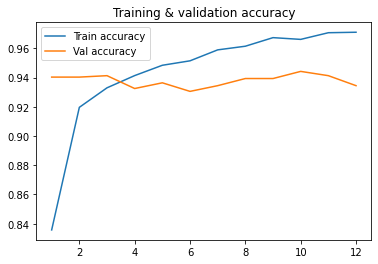

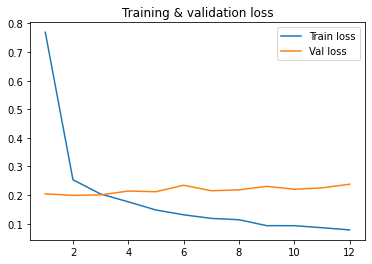

In [65]:
#  dddkhghvvvvvv,mmmmmhh
acc = history_concatenated.history['accuracy'] + history_concatenated_new.history['accuracy']
val_acc = history_concatenated.history['val_accuracy'] + history_concatenated_new.history['val_accuracy']
loss = history_concatenated.history['loss']  + history_concatenated_new.history['loss']
val_loss = history_concatenated.history['val_loss'] + history_concatenated_new.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.plot(epochs, acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Val accuracy')
plt.title('Training & validation accuracy')
plt.legend()

# Loss
plt.figure()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Training & validation loss')
plt.legend()
plt.show()

In [73]:
concatenated_model.save('dog_breed_concatenated_model_TrainDataChanged.h5')
concatenated_model.save_weights('dog_breed_concatenated_model_weight_TrainDataChanged.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## **9.) Final submission**

> As you can see, we have clear winner, NasNet Neural Network with highest training and validation accuracy.
Hence, we will make submission using this model.

In [66]:
submission = pd.read_csv('../input/dog-breed-identification/sample_submission.csv')
submission

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10353,fff1ec9e6e413275984966f745a313b0,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10354,fff74b59b758bbbf13a5793182a9bbe4,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10355,fff7d50d848e8014ac1e9172dc6762a3,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [67]:
test_df = submission.copy()
test_df = pd.DataFrame(test_df.id)
# test_df['breed'] = ['affenpinscher']*test_df.shape[0]
test_df.id = test_df.id + '.jpg'
display(test_df)

,id
0,000621fb3cbb32d8935728e48679680e.jpg
1,00102ee9d8eb90812350685311fe5890.jpg
2,0012a730dfa437f5f3613fb75efcd4ce.jpg
3,001510bc8570bbeee98c8d80c8a95ec1.jpg
4,001a5f3114548acdefa3d4da05474c2e.jpg
...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8.jpg
10353,fff1ec9e6e413275984966f745a313b0.jpg
10354,fff74b59b758bbbf13a5793182a9bbe4.jpg
10355,fff7d50d848e8014ac1e9172dc6762a3.jpg


In [68]:
test_gen = ImageDataGenerator()

test_data = test_gen.flow_from_dataframe(dataframe = test_df,
                                           directory = TEST_DIR,
                                           x_col = 'id', y_col = None,
                                           class_mode =None,
                                           shuffle=False,
                                           target_size=(IMAGE_SIZE[0], IMAGE_SIZE[0]) 
                                          )

Found 10357 validated image filenames.


In [69]:
pred = concatenated_model.predict(test_data)
pred

array([[7.3019908e-07, 3.4124633e-07, 1.2875960e-08, ..., 2.9016516e-09,
        7.5232158e-08, 3.3016281e-08],
       [9.8586064e-09, 8.5409813e-09, 6.5113914e-10, ..., 2.4400506e-09,
        1.9375801e-08, 2.0337438e-09],
       [1.0738886e-08, 1.5661822e-06, 3.3451734e-08, ..., 1.8544435e-09,
        2.8583589e-09, 2.7459695e-09],
       ...,
       [2.4510848e-07, 7.2445738e-07, 1.6876451e-05, ..., 6.4061268e-08,
        4.2561493e-07, 1.4640233e-08],
       [1.0919510e-05, 5.4131607e-07, 2.0356912e-07, ..., 1.4772165e-07,
        5.4790797e-07, 8.5904156e-07],
       [2.6533468e-07, 2.2847033e-05, 9.0924169e-07, ..., 4.5961096e-06,
        9.2564065e-08, 9.1698617e-08]], dtype=float32)

In [70]:
pred.shape

(10357, 120)

In [71]:
submission.iloc[:,1:] = pred
submission

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,7.301991e-07,3.412463e-07,1.287596e-08,1.337331e-08,2.627301e-09,2.608556e-09,2.132790e-08,9.236428e-09,6.196433e-09,...,1.604319e-07,1.371669e-08,1.654855e-08,1.272284e-08,2.335291e-08,1.986696e-09,1.447185e-09,2.901652e-09,7.523216e-08,3.301628e-08
1,00102ee9d8eb90812350685311fe5890,9.858606e-09,8.540981e-09,6.511391e-10,8.504974e-09,3.538503e-09,3.386822e-09,1.415313e-08,2.221060e-09,6.566994e-10,...,5.900816e-09,3.179457e-10,2.301121e-09,1.364249e-08,1.201111e-08,1.013879e-09,9.740052e-09,2.440051e-09,1.937580e-08,2.033744e-09
2,0012a730dfa437f5f3613fb75efcd4ce,1.073889e-08,1.566182e-06,3.345173e-08,1.547518e-08,2.942008e-09,1.241900e-09,1.502623e-08,4.552354e-09,2.693644e-09,...,4.734196e-09,5.820562e-09,5.514396e-08,9.068236e-08,1.629641e-06,1.307350e-08,1.116181e-09,1.854443e-09,2.858359e-09,2.745969e-09
3,001510bc8570bbeee98c8d80c8a95ec1,6.143847e-06,5.908793e-07,3.028257e-09,1.104533e-07,4.001587e-09,1.967865e-09,4.267639e-08,7.979460e-09,1.076385e-08,...,4.038300e-08,7.655947e-10,4.927054e-08,6.426503e-09,4.746660e-08,4.002233e-10,5.212961e-10,1.536074e-07,9.554895e-10,4.362720e-09
4,001a5f3114548acdefa3d4da05474c2e,6.473796e-03,1.556403e-05,5.831427e-07,2.968969e-07,7.660951e-08,1.684848e-07,7.402150e-06,1.608623e-06,2.410196e-06,...,2.445173e-06,1.341988e-06,6.823601e-07,2.048837e-06,2.664505e-06,2.441203e-08,1.558637e-08,3.590828e-06,2.062751e-06,7.865733e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8,1.286639e-06,1.392504e-04,8.692327e-07,4.357842e-06,3.035296e-07,9.604414e-07,3.269771e-06,1.415090e-06,1.527695e-06,...,9.215028e-04,4.190674e-07,5.930598e-07,2.653692e-05,6.980123e-06,3.510038e-07,9.126499e-07,7.767836e-06,3.438420e-06,1.218650e-07
10353,fff1ec9e6e413275984966f745a313b0,8.407895e-10,4.213940e-10,1.146880e-09,2.441002e-09,7.130494e-09,8.164298e-11,2.862718e-09,3.470326e-11,6.856927e-12,...,7.808522e-10,3.241988e-11,4.925417e-08,3.710781e-11,9.999992e-01,2.488384e-11,4.408696e-11,1.967867e-10,2.119922e-09,3.161602e-10
10354,fff74b59b758bbbf13a5793182a9bbe4,2.451085e-07,7.244574e-07,1.687645e-05,6.483471e-08,1.706541e-08,1.260883e-07,2.297473e-06,1.767578e-07,1.977117e-08,...,1.114342e-07,2.096528e-07,1.497476e-08,1.729727e-07,3.882905e-08,4.959210e-07,2.479661e-08,6.406127e-08,4.256149e-07,1.464023e-08
10355,fff7d50d848e8014ac1e9172dc6762a3,1.091951e-05,5.413161e-07,2.035691e-07,2.770417e-07,5.903760e-08,3.666000e-08,1.440725e-06,2.823594e-07,4.537840e-07,...,8.689861e-07,1.093792e-07,3.690047e-07,3.246892e-07,3.228276e-07,3.313894e-09,5.559032e-08,1.477217e-07,5.479080e-07,8.590416e-07


In [72]:
submission.to_csv('dog_breed_submission_concatenated_changedTrainData.csv',index = False) 